# Initialization

In [52]:
from math import *
from numpy import *
import matplotlib.pyplot as plt
import matplotlib.ticker
import pandas as pd

In [53]:
pd.set_option("display.max_rows", 300)
pd.set_option("display.max_columns", 6)
pd.set_option('display.float_format', '{:.6e}'.format)

# Data extraction

There are different files from which one would want to extract data:

- Original .dat file sent by Anatoli Fedynitch with NA61/SHINE datasets for charged pions, charged kaons and (anti-)protons at 158 and 350 GeV/c
- Simulated datasets in the Rivet format .yoda, using different hadronic interaction models (EPOS 1.99, EPOS-LHC, Sibyll 2.1, Sibyll 2.3d, QGSJet-II.04, Pythia8, etc ...)
- Future HepData official .yoda entry with complete identified outgoing particles

In order to extract the datasets, one needs to consider the original format of the .dat file. It was sent by Anatoli Fedynitch. The file has a maximum of five columns separated by one or two spaces, which will be used to define the dataframe and fill it immediately using the `pd.read_csv()` function and the separator `delim_whitespace` activated.

In [54]:
col = []
for i in range (5):
    col.append('c%i' %(i))

df = pd.read_csv('NA61SHINE_2022_I2155140.dat', delim_whitespace=True, names=col)
df.columns = ['x', 'y', 'ystat', 'ysys-', 'ysys+']

Secondly, one needs to deal with numbers and not strings. Therefore a conversion to numerical values is done using the functionality `pd.to_numeric`.

In [55]:
dfn = df.apply(pd.to_numeric, errors='coerce', axis=1)
#display(dfn)
df

,x,y,ystat,ysys-,ysys+
0,#p_beam,=,158,GeV/c,NaN
1,#Particle,=,pion+,NaN,NaN
2,#<p>/GeV/c,p*(dn/dp),stat,syst-,syst+
3,1.42,0.782,0.00948,0.0449,0.0326
4,2.2,0.778,0.0054,0.0251,0.0221
5,2.62,0.81,0.00229,0.0213,0.0188
6,3.08,0.803,0.00533,0.0194,0.0152
7,3.6,0.79,0.00181,0.0224,0.0169
8,4.34,0.782,0.00154,0.023,0.0162
9,5.55,0.765,0.00114,0.0254,0.017


In [56]:
#energy

#for i in range (len(df)) :
#    if (dfn.ystat.iloc[i]==158) :
#        print('158 @ index', dfn.index[i])
#    elif (dfn.ystat.iloc[i]==350) :
#        print('350 @ index', dfn.index[i])        

In [57]:
#for i in range (len(dfn)) :
#    if (dfn.ystat.iloc[i]==158 and dfn.ystat.iloc[i]==350) :     

One calculates the total error bars, merging together contributions from statistic and systematic errors following the formula $\Delta_{\text{tot}} = \sqrt{{\Delta_{\text{stat}}}^2 + {\Delta_{\text{sys}}}^2}$ for both upper and lower parts.

In [58]:
dfn.loc[:,'yerrm'] = sqrt((dfn['ystat'])**2 + (dfn['ysys-'])**2)
dfn.loc[:,'yerrp'] = sqrt((dfn['ystat'])**2 + (dfn['ysys+'])**2)

The x-axis binning was sent by Michael Unger at a later time and is implemented as a `list` with the values. When converting to a YODA1 file, one needed to format the dataset following where a value `x` in a x-bin was defined with `xerr-` and `xerr+` errorbars. 

In [60]:
dfc = dfn
dfc = dfc.drop(['ystat', 'ysys-', 'ysys+'], axis=1)
dfc.insert(1, 'xerrm', 0.000000e+00)
dfc.insert(2, 'xerrp', 0.000000e+00)
    
xbin = [0.1, 0.1318, 0.1622, 0.1995, 0.2512, 0.3162, 0.3890, 0.4786, 0.6026, 0.7586, 0.9550, 1.259, 1.585, 1.995, 2.399, 2.851, 3.311, 3.890, 4.786, 6.310, 7.943, 10., 12.59, 15.85, 19.95, 25.12, 31.62, 39.81, 50.12, 63.10, 79.43, 100., 125.9, 158.5, 199.5, 251.2, 316.2]

for i in range (0, len(dfc)) :
    for j in range (0, len(xbin)-1):
        if (dfc.x.loc[i]>xbin[j] and dfc.x.loc[i]<xbin[j+1] and xbin[j]<xbin[j+1] ):
            dfc.xerrm.loc[i] = dfc.x.loc[i]-xbin[j]
            dfc.xerrp.loc[i] = xbin[j+1]-dfc.x.loc[i]

dfc = dfc.rename(columns={"xerrm": "xerr-", "xerrp": "xerr+", "yerrm": "yerr-", "yerrp": "yerr+"})   
dfc = dfc.to_string(index=False)
#print(dfc)

In [61]:
j= 0
k = l = m = n = o = p = 0
q = r = s = t = u = v = 0

for i in range (0,224) :
    if (j>2 and j<22) :
        print(k, ': {stat: {dn:', dfn.ystat[i], ', up:', dfn.ystat[i], '}, sys: {dn:', dfn['ysys-'][i], ', up:', dfn['ysys+'][i], '}},')
        k=k+1
    if (j>24 and j<43) :
        print(l,': {stat: {dn:', dfn.ystat[i], ', up:', dfn.ystat[i], '}, sys: {dn:', dfn['ysys-'][i], ', up:', dfn['ysys+'][i], '}},')
        l=l+1
    if (j>45 and j<59) :
        print(m,': {stat: {dn:', dfn.ystat[i], ', up:', dfn.ystat[i], '}, sys: {dn:', dfn['ysys-'][i], ', up:', dfn['ysys+'][i], '}},')
        m=m+1
    if (j>61 and j<76) :
        print(n,': {stat: {dn:', dfn.ystat[i], ', up:', dfn.ystat[i], '}, sys: {dn:', dfn['ysys-'][i], ', up:', dfn['ysys+'][i], '}},')
        n=n+1
    if (j>78 and j<95) :
        print(o,': {stat: {dn:', dfn.ystat[i], ', up:', dfn.ystat[i], '}, sys: {dn:', dfn['ysys-'][i], ', up:', dfn['ysys+'][i], '}},')
        o=o+1
    if (j>97 and j<112) :
        print(p,': {stat: {dn:', dfn.ystat[i], ', up:', dfn.ystat[i], '}, sys: {dn:', dfn['ysys-'][i], ', up:', dfn['ysys+'][i], '}},')
        p=p+1
        
    if (j>114 and j<134) :
        print(q, ': {stat: {dn:', dfn.ystat[i], ', up:', dfn.ystat[i], '}, sys: {dn:', dfn['ysys-'][i], ', up:', dfn['ysys+'][i], '}},')
        q=q+1
    if (j>136 and j<156) :
        print(r,': {stat: {dn:', dfn.ystat[i], ', up:', dfn.ystat[i], '}, sys: {dn:', dfn['ysys-'][i], ', up:', dfn['ysys+'][i], '}},')
        r=r+1
    if (j>158 and j<171) :
        print(s,': {stat: {dn:', dfn.ystat[i], ', up:', dfn.ystat[i], '}, sys: {dn:', dfn['ysys-'][i], ', up:', dfn['ysys+'][i], '}},')
        s=s+1
    if (j>173 and j<188) :
        print(t,': {stat: {dn:', dfn.ystat[i], ', up:', dfn.ystat[i], '}, sys: {dn:', dfn['ysys-'][i], ', up:', dfn['ysys+'][i], '}},')
        t=t+1
    if (j>190 and j<207) :
        print(u,': {stat: {dn:', dfn.ystat[i], ', up:', dfn.ystat[i], '}, sys: {dn:', dfn['ysys-'][i], ', up:', dfn['ysys+'][i], '}},')
        u=u+1
    if (j>209 and j<224) :
        print(v,': {stat: {dn:', dfn.ystat[i], ', up:', dfn.ystat[i], '}, sys: {dn:', dfn['ysys-'][i], ', up:', dfn['ysys+'][i], '}},')
        v=v+1
        
    j=j+1

0 : {stat: {dn: 0.00948 , up: 0.00948 }, sys: {dn: 0.0449 , up: 0.0326 }},
1 : {stat: {dn: 0.0054 , up: 0.0054 }, sys: {dn: 0.0251 , up: 0.0221 }},
2 : {stat: {dn: 0.00229 , up: 0.00229 }, sys: {dn: 0.0213 , up: 0.0188 }},
3 : {stat: {dn: 0.00533 , up: 0.00533 }, sys: {dn: 0.0194 , up: 0.0152 }},
4 : {stat: {dn: 0.00181 , up: 0.00181 }, sys: {dn: 0.0224 , up: 0.0169 }},
5 : {stat: {dn: 0.00154 , up: 0.00154 }, sys: {dn: 0.023 , up: 0.0162 }},
6 : {stat: {dn: 0.00114 , up: 0.00114 }, sys: {dn: 0.0254 , up: 0.017 }},
7 : {stat: {dn: 0.00115 , up: 0.00115 }, sys: {dn: 0.0199 , up: 0.0167 }},
8 : {stat: {dn: 0.00109 , up: 0.00109 }, sys: {dn: 0.016 , up: 0.0151 }},
9 : {stat: {dn: 0.00102 , up: 0.00102 }, sys: {dn: 0.0124 , up: 0.0129 }},
10 : {stat: {dn: 0.00096 , up: 0.00096 }, sys: {dn: 0.01 , up: 0.0106 }},
11 : {stat: {dn: 0.000895 , up: 0.000895 }, sys: {dn: 0.00847 , up: 0.00875 }},
12 : {stat: {dn: 0.000822 , up: 0.000822 }, sys: {dn: 0.00706 , up: 0.00715 }},
13 : {stat: {dn: 0.00

When converting to a YODA2 file, it is no longer necessary to compute these `xerr-` and `xerr+` errorbars. One needs to include a line with the bin edges for the x-axis instead, following the format: `Edges(A1): [0.000000e+00, 5.000000e-01, 1.000000e+00]` e.g. in case of a binned object with one axis that has two bins between 0 and 1. It is possible to mask bins if empty using `MaskedBins: [2]` e.g. in case of the bin N=2 being empty and the line is being replaced by `nan          	---          	---          	---          	---  ` in the .yoda file.

In [62]:
dfd = dfn
dfd = dfd.drop(['yerrm', 'yerrp'], axis=1)
dfd.insert(1, 'xedgem', 0.000000e+00)
dfd.insert(2, 'xedgep', 0.000000e+00)

xbin = [0.1, 0.1318, 0.1622, 0.1995, 0.2512, 0.3162, 0.3890, 0.4786, 0.6026, 0.7586, 0.9550, 1.259, 1.585, 1.995, 2.399, 2.851, 3.311, 3.890, 4.786, 6.310, 7.943, 10., 12.59, 15.85, 19.95, 25.12, 31.62, 39.81, 50.12, 63.10, 79.43, 100., 125.9, 158.5, 199.5, 251.2, 316.2]

for i in range (0, len(dfd)) :
    for j in range (0, len(xbin)-1):
        if (dfd.x.loc[i]>xbin[j] and dfd.x.loc[i]<xbin[j+1] and xbin[j]<xbin[j+1] ):
            dfd.xedgem.loc[i] = xbin[j]
            dfd.xedgep.loc[i] = xbin[j+1]

dfd = dfd.drop(['ystat', 'y', 'ysys-', 'ysys+'], axis=1)
dfd

,x,xedgem,xedgep
0,NaN,0.000000e+00,0.000000e+00
1,NaN,0.000000e+00,0.000000e+00
2,NaN,0.000000e+00,0.000000e+00
3,1.420000e+00,1.259000e+00,1.585000e+00
4,2.200000e+00,1.995000e+00,2.399000e+00
5,2.620000e+00,2.399000e+00,2.851000e+00
6,3.080000e+00,2.851000e+00,3.311000e+00
7,3.600000e+00,3.311000e+00,3.890000e+00
8,4.340000e+00,3.890000e+00,4.786000e+00
9,5.550000e+00,4.786000e+00,6.310000e+00


In addition, one will include a line with the error source labels: `ErrorLabels: ["stat", "sys"]`. There is no longer a need to compute shared error values for statistic and systematic errors since they can be individually displayed. The lower part of errors need to have their negative sign `-` as part of the value, and the statistic errors for both positive and negative part need to be displayed.

In [63]:
dfe = dfn
dfe['ystat-'] = -dfe['ystat']
dfe['ysys-'] = -dfe['ysys-']

dfe = dfe[['y', 'ystat-', 'ystat', 'ysys-', 'ysys+']]
display(dfe)

,y,ystat-,ystat,ysys-,ysys+
0,NaN,-1.580000e+02,1.580000e+02,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN
3,7.820000e-01,-9.480000e-03,9.480000e-03,-4.490000e-02,3.260000e-02
4,7.780000e-01,-5.400000e-03,5.400000e-03,-2.510000e-02,2.210000e-02
5,8.100000e-01,-2.290000e-03,2.290000e-03,-2.130000e-02,1.880000e-02
6,8.030000e-01,-5.330000e-03,5.330000e-03,-1.940000e-02,1.520000e-02
7,7.900000e-01,-1.810000e-03,1.810000e-03,-2.240000e-02,1.690000e-02
8,7.820000e-01,-1.540000e-03,1.540000e-03,-2.300000e-02,1.620000e-02
9,7.650000e-01,-1.140000e-03,1.140000e-03,-2.540000e-02,1.700000e-02


# Plotting

In [64]:
#fig, axs = plt.subplots(3, 2, figsize=(8,12), dpi=100)

#for i in range(0,12):
#    ax = plt.subplot(3,2,i%2+1);
#    plt.plot(dfd[i], dfd[i+1])

In [68]:
dfn['ysys-'] = -dfn['ysys-']

Text(0.01, 0, '$\\pi^{-}+C \\rightarrow p^{-}+X$ @ 158 GeV')

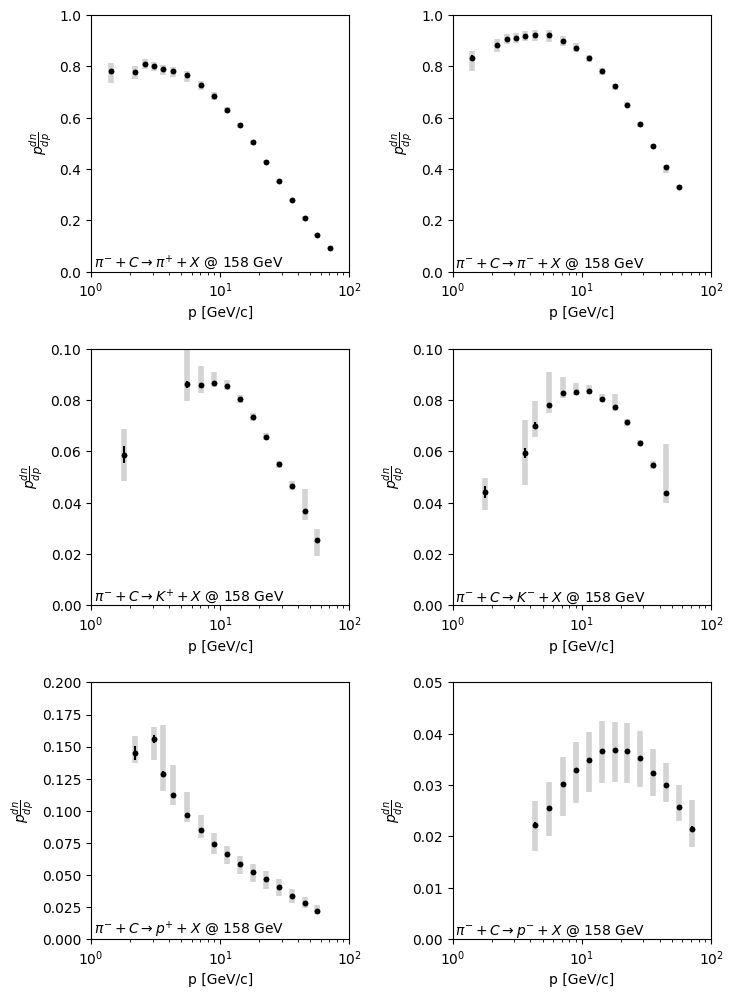

In [69]:
fig, axs  = plt.subplots(3, 2, figsize=(8,12), dpi=100)
fig.subplots_adjust(hspace=0.3, wspace=0.4)

ax = plt.subplot(321)
plt.errorbar(dfn.x[3:21], dfn.y[3:21], yerr=[dfn['ysys-'][3:21],dfn['ysys+'][3:21]], c='black', fmt='o', ms=3, ecolor='lightgrey', elinewidth=4)
plt.errorbar(dfn.x[3:21], dfn.y[3:21], yerr=dfn.ystat[3:21], c='black', fmt='o', ms=3, ecolor='black')
plt.xscale('log', base=10)
plt.xlim(1,100)
plt.ylim(0,1)
plt.xlabel('p [GeV/c]')
plt.ylabel(r'$p \frac{dn}{dp}$')
ax.text(0.01, 0, r'$\pi^{-}+C \rightarrow \pi^{+}+X$ @ 158 GeV', transform=ax.transAxes, fontsize=10, va='bottom')

ax1 = plt.subplot(322)
plt.errorbar(dfn.x[25:42], dfn.y[25:42], yerr=[dfn['ysys-'][25:42], dfn['ysys+'][25:42]], c='black', fmt='o', ms=3, ecolor='lightgrey', elinewidth=4)
plt.errorbar(dfn.x[25:42], dfn.y[25:42], yerr=dfn.ystat[25:42], c='black', fmt='o', ms=3, ecolor='black')
plt.xscale('log', base=10)
plt.xlim(1,100)
plt.ylim(0,1)
plt.xlabel('p [GeV/c]')
plt.ylabel(r'$p \frac{dn}{dp}$')
ax1.text(0.01, 0, r'$\pi^{-}+C \rightarrow \pi^{-}+X$ @ 158 GeV', transform=ax1.transAxes, fontsize=10, va='bottom')

ax2 = plt.subplot(323)
plt.errorbar(dfn.x[46:58], dfn.y[46:58], yerr=[dfn['ysys-'][46:58],dfn['ysys+'][46:58]], c='black', fmt='o', ms=3, ecolor='lightgrey', elinewidth=4)
plt.errorbar(dfn.x[46:58], dfn.y[46:58], yerr=dfn.ystat[46:58], c='black', fmt='o', ms=3, ecolor='black')
plt.xscale('log', base=10)
plt.xlim(1,100)
plt.ylim(0,0.1)
plt.xlabel('p [GeV/c]')
plt.ylabel(r'$p \frac{dn}{dp}$')
ax2.text(0.01, 0, r'$\pi^{-}+C \rightarrow K^{+}+X$ @ 158 GeV', transform=ax2.transAxes, fontsize=10, va='bottom')

ax3 = plt.subplot(324)
plt.errorbar(dfn.x[62:75], dfn.y[62:75], yerr=[dfn['ysys-'][62:75],dfn['ysys+'][62:75]], c='black', fmt='o', ms=3, ecolor='lightgrey', elinewidth=4)
plt.errorbar(dfn.x[62:75], dfn.y[62:75], yerr=dfn.ystat[62:75], c='black', fmt='o', ms=3, ecolor='black')
plt.xscale('log', base=10)
plt.xlim(1,100)
plt.ylim(0,0.1)
plt.xlabel('p [GeV/c]')
plt.ylabel(r'$p \frac{dn}{dp}$')
ax3.text(0.01, 0, r'$\pi^{-}+C \rightarrow K^{-}+X$ @ 158 GeV', transform=ax3.transAxes, fontsize=10, va='bottom')

ax4 = plt.subplot(325)
plt.errorbar(dfn.x[79:94], dfn.y[79:94], yerr=[dfn['ysys-'][79:94],dfn['ysys+'][79:94]], c='black', fmt='o', ms=3, ecolor='lightgrey', elinewidth=4)
plt.errorbar(dfn.x[79:94], dfn.y[79:94], yerr=dfn.ystat[79:94], c='black', fmt='o', ms=3, ecolor='black')
plt.xscale('log', base=10)
plt.xlim(1,100)
plt.ylim(0,0.2)
plt.xlabel('p [GeV/c]')
plt.ylabel(r'$p \frac{dn}{dp}$')
ax4.text(0.01, 0, r'$\pi^{-}+C \rightarrow p^{+}+X$ @ 158 GeV', transform=ax4.transAxes, fontsize=10, va='bottom')

ax5 = plt.subplot(326)
plt.errorbar(dfn.x[98:111], dfn.y[98:111], yerr=[dfn['ysys-'][98:111],dfn['ysys+'][98:111]], c='black', fmt='o', ms=3, ecolor='lightgrey', elinewidth=4)
plt.errorbar(dfn.x[98:111], dfn.y[98:111], yerr=dfn.ystat[98:111], c='black', fmt='o', ms=3, ecolor='black')
plt.xscale('log', base=10)
plt.xlim(1,100)
plt.ylim(0,0.05)
plt.xlabel('p [GeV/c]')
plt.ylabel(r'$p \frac{dn}{dp}$')
ax5.text(0.01, 0, r'$\pi^{-}+C \rightarrow p^{-}+X$ @ 158 GeV', transform=ax5.transAxes, fontsize=10, va='bottom')

Text(0.01, 0, '$\\pi^{-}+C \\rightarrow p^{-}+X$ @ 350 GeV')

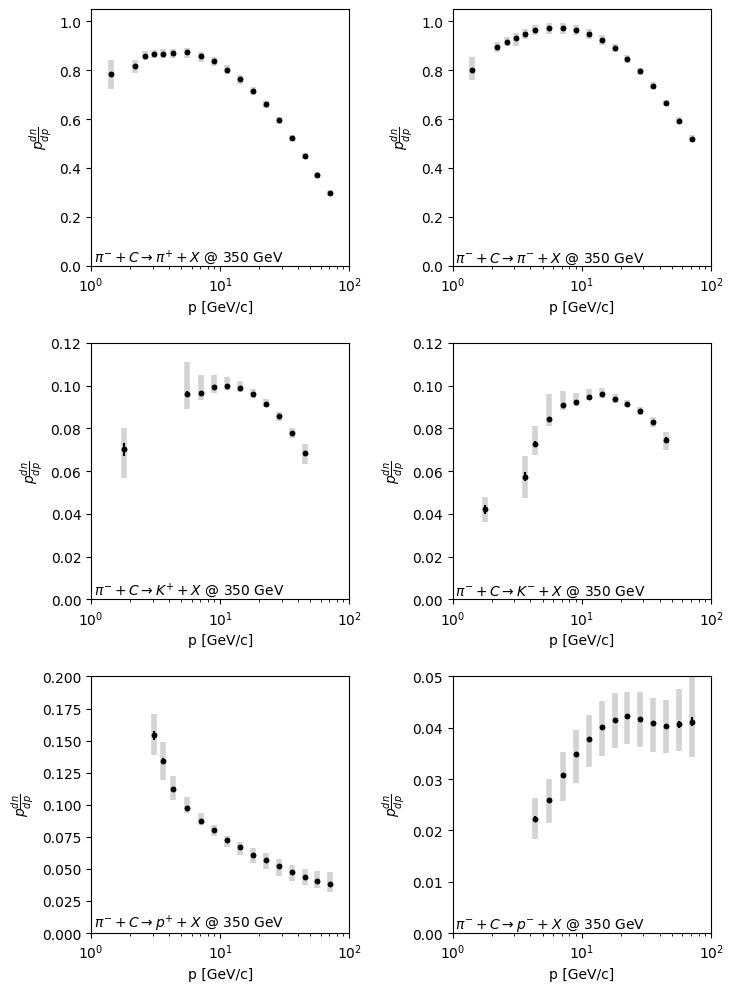

In [70]:
fig, axs  = plt.subplots(3, 2, figsize=(8,12), dpi=100)
fig.subplots_adjust(hspace=0.3, wspace=0.4)

ax = plt.subplot(321)
plt.errorbar(dfn.x[115:133], dfn.y[115:133], yerr=[dfn['ysys-'][115:133], dfn['ysys+'][115:133]], c='black', fmt='o', ms=3, ecolor='lightgrey', elinewidth=4)
plt.errorbar(dfn.x[115:133], dfn.y[115:133], yerr=dfn.ystat[115:133], c='black', fmt='o', ms=3, ecolor='black')
plt.xscale('log', base=10)
plt.xlim(1,100)
plt.ylim(0,1.05)
plt.xlabel('p [GeV/c]')
plt.ylabel(r'$p \frac{dn}{dp}$')
ax.text(0.01, 0, r'$\pi^{-}+C \rightarrow \pi^{+}+X$ @ 350 GeV', transform=ax.transAxes, fontsize=10, va='bottom')

ax1 = plt.subplot(322)
plt.errorbar(dfn.x[137:155], dfn.y[137:155], yerr=[dfn['ysys-'][137:155], dfn.yerrp[137:155]], c='black', fmt='o', ms=3, ecolor='lightgrey', elinewidth=4)
plt.errorbar(dfn.x[137:155], dfn.y[137:155], yerr=dfn.ystat[137:155], c='black', fmt='o', ms=3, ecolor='black')
plt.xscale('log', base=10)
plt.xlim(1,100)
plt.ylim(0,1.05)
plt.xlabel('p [GeV/c]')
plt.ylabel(r'$p \frac{dn}{dp}$')
ax1.text(0.01, 0, r'$\pi^{-}+C \rightarrow \pi^{-}+X$ @ 350 GeV', transform=ax1.transAxes, fontsize=10, va='bottom')

ax2 = plt.subplot(323)
plt.errorbar(dfn.x[159:170], dfn.y[159:170], yerr=[dfn['ysys-'][159:170], dfn['ysys+'][159:170]], c='black', fmt='o', ms=3, ecolor='lightgrey', elinewidth=4)
plt.errorbar(dfn.x[159:170], dfn.y[159:170], yerr=dfn.ystat[159:170], c='black', fmt='o', ms=3, ecolor='black')
plt.xscale('log', base=10)
plt.xlim(1,100)
plt.ylim(0,0.12)
plt.xlabel('p [GeV/c]')
plt.ylabel(r'$p \frac{dn}{dp}$')
ax2.text(0.01, 0, r'$\pi^{-}+C \rightarrow K^{+}+X$ @ 350 GeV', transform=ax2.transAxes, fontsize=10, va='bottom')

ax3 = plt.subplot(324)
plt.errorbar(dfn.x[174:187], dfn.y[174:187], yerr=[dfn['ysys-'][174:187], dfn['ysys+'][174:187]], c='black', fmt='o', ms=3, ecolor='lightgrey', elinewidth=4)
plt.errorbar(dfn.x[174:187], dfn.y[174:187], yerr=dfn.ystat[174:187], c='black', fmt='o', ms=3, ecolor='black')
plt.xscale('log', base=10)
plt.xlim(1,100)
plt.ylim(0,0.12)
plt.xlabel('p [GeV/c]')
plt.ylabel(r'$p \frac{dn}{dp}$')
ax3.text(0.01, 0, r'$\pi^{-}+C \rightarrow K^{-}+X$ @ 350 GeV', transform=ax3.transAxes, fontsize=10, va='bottom')

ax4 = plt.subplot(325)
plt.errorbar(dfn.x[191:206], dfn.y[191:206], yerr=[dfn['ysys-'][191:206], dfn['ysys+'][191:206]], c='black', fmt='o', ms=3, ecolor='lightgrey', elinewidth=4)
plt.errorbar(dfn.x[191:206], dfn.y[191:206], yerr=dfn.ystat[191:206], c='black', fmt='o', ms=3, ecolor='black')
plt.xscale('log', base=10)
plt.xlim(1,100)
plt.ylim(0,0.2)
plt.xlabel('p [GeV/c]')
plt.ylabel(r'$p \frac{dn}{dp}$')
ax4.text(0.01, 0, r'$\pi^{-}+C \rightarrow p^{+}+X$ @ 350 GeV', transform=ax4.transAxes, fontsize=10, va='bottom')

ax5 = plt.subplot(326)
plt.errorbar(dfn.x[210:223], dfn.y[210:223], yerr=[dfn['ysys-'][210:223], dfn['ysys+'][210:223]], c='black', fmt='o', ms=3, ecolor='lightgrey', elinewidth=4)
plt.errorbar(dfn.x[210:223], dfn.y[210:223], yerr=dfn.ystat[210:223], c='black', fmt='o', ms=3, ecolor='black')
plt.xscale('log', base=10)
plt.xlim(1,100)
plt.ylim(0,0.05)
plt.xlabel('p [GeV/c]')
plt.ylabel(r'$p \frac{dn}{dp}$')
ax5.text(0.01, 0, r'$\pi^{-}+C \rightarrow p^{-}+X$ @ 350 GeV', transform=ax5.transAxes, fontsize=10, va='bottom')